# 数値計算  
- **Submission date**: 2017/10/13
- **Team**: へび  
- **Members**:  
    + #5501 Kazunori Sakai  
    + #5531 Akihiro Nitta  
    + #5557 Yuki Kotakehara  

## モジュールの読み込み  
- [NumPy](http://www.numpy.org)  
- [SciPy](https://www.scipy.org/)  
- [Matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## 1.9 課題 p.13  

- **2.** 次の関数 `f(x)=exp(−x)−2exp(−2x)` の解を二分法，Newton法で求めよ．　　
- **3.** 代数方程式に関する次の課題に答えよ．(2004年度期末試験)　　
    - (a) `exp(-x)=x**2` を二分法及びニュートン法で解け．　　
    - (b) n回目の値x_nと小数点以下10桁まで求めた値x_f=0.7034674225との差Δx_nの絶対値(abs)のlogをnの関数としてプロットし，その収束性を比較せよ．また，その傾きの違いを両解法の原理から説明せよ．  

In [2]:
# 2
def f(x):
    return np.exp(-x)-2*np.exp(-2*x)

def df(x):
    return -np.exp(-x)+4*np.exp(-2*x)

## bisection
solution1 = optimize.bisect(f, -5, 5)

## Newton
solution2 = optimize.newton(f, 1, df)

print('bisection: ' + str(solution1))
print('newton: ' + str(solution2))

bisection: 0.6931471805603451
newton: 0.69314718056


newton
x= 0.703467422498
x1              f1             
1.0000000000    -0.6321205588285576659757226
0.7330436052    -0.0569084480040253914978621
0.7038077863    -0.0006473915387465445370196
0.7034674683    -0.0000000871660306156485376
0.7034674225    -0.0000000000000014988010832
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
0.7034674225    +0.0000000000000000000000000
bisection
x1              x2              f

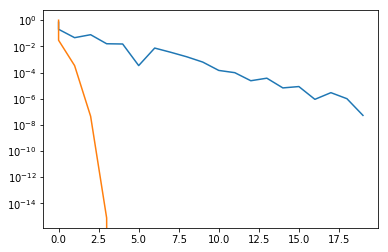

In [3]:
# 3 (a)
def func(x):
    return np.exp(-x)-x*x

def dfunc(x):
    return -np.exp(-x)-2*x

## newton
print('newton')
def newton_method(x, eps, n):
    """
    Arguments:
    x:初期値
    eps:収束条件
    n:繰り返し回数

    Returns:
    if(n<0):収束した解
    if(n>=0):n回目の解

    """

    count = 0
    while True:

        x2 = x - func(x) / dfunc(x)
        count = count + 1
        
        if(n >= 0 and count > n):
            return x2

        elif(abs(x2-x) < eps):
            return x2

        x = x2


x = newton_method(10.0, 0.0000001, -1) #初期値10
print("x=", x)

x0 = x

x1 = 1.0
f1 = func(x1)
print('%-15s %-15s'  % ('x1','f1'))

list_newton = [[0],[x1]]

for i in range(20):
    print('%-15.10f %+24.25f' % (x1,f1))
    x1 = x1 - f1 / dfunc(x1)
    f1 = func(x1)
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))


## bisection
print("bisection")
x1, x2 = 0.0, 1.0
f1, f2 = func(x1), func(x2)
print('%-15s %-15s %-15s %-15s'  % ('x1','x2','f1','f2'))

list_bisec = [[0],[abs(x1-x)]]

for i in range(20):
    x = (x1+x2)/2
    f = func(x)
    if(f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))
    print('%-15.10f %-15.10f %-15.10f %-15.10f' % (x1, x2, f1, f2))

# 3 (b)
X = list_bisec[0]
Y = list_bisec[1]

plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]

plt.plot(X, Y)

plt.yscale("log")
plt.show()